In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
def fixed_point_function(x, beta, J, delta):
    return 2*np.exp(-beta*delta)*np.sinh(beta*J*x)/(1+2*np.exp(-beta*delta)*np.cosh(beta*J*x))

def fixed_point_iter(T, J, delta, x_init=0.05, eta=0.8, tol=1e-6, maxIter = 1e5):
    x = x_init
    x_prev = x_init
    for _ in np.arange(maxIter):
        x_prev = x
        x = fixed_point_function(x, 1/T, J, delta)*eta + (1-eta)*x_prev
        if np.abs(x-x_prev) < tol:
            break
    return x


In [18]:
#plot magnetisation at different T and Delta

J = 1
Delta_list = [0, .1, .2, .3, .4, .49]
T = np.linspace(1e-2, .7, 1024)
x_init = 0.3
x_star_list = []
for delta in Delta_list:
    x_star = np.zeros(len(T))
    for i in np.arange(len(T)):
        x_star[i] = fixed_point_iter(T[i], J, delta, x_init=x_init)
    x_star_list.append(x_star)


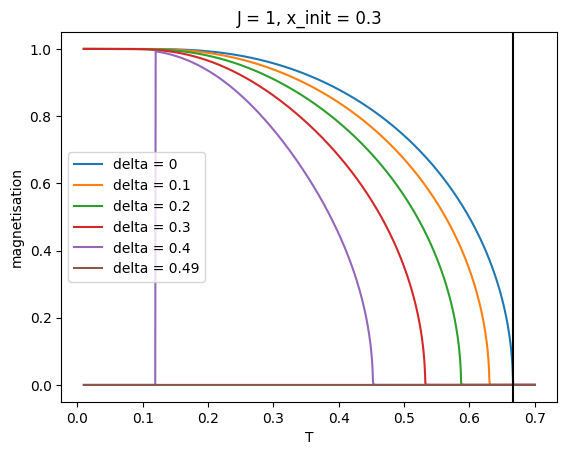

In [19]:
for idx, delta in enumerate(Delta_list):
    plt.plot(T, x_star_list[idx], label = 'delta = ' + str(delta))

plt.axvline(x=2/3, color="black")
plt.xlabel('T')
plt.ylabel('magnetisation')
plt.title(f"J = {J}, x_init = {x_init}")
plt.legend()
plt.show()

In [20]:
## plotting free energy
def free_energy(x, T, J, delta):
    beta = 1/T
    return J/2*x**2-1/beta*np.log(1+2*np.exp(-beta*delta)*np.cosh(beta*J*x))

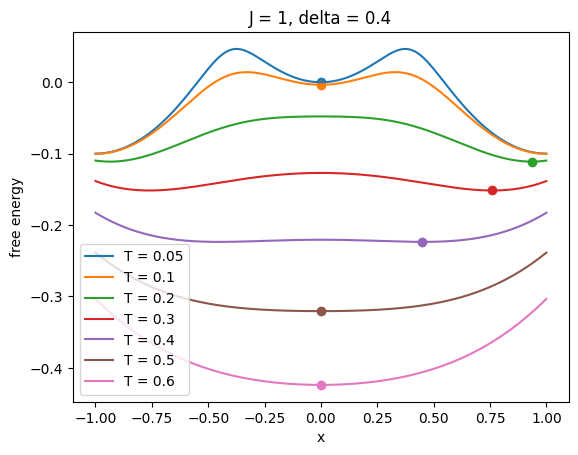

In [26]:
J = 1
delta = 0.4
x_space = np.linspace(-1, 1, 1024)
T_list = [.05, .1, .2, .3, .4, .5, .6]

for T in T_list:
    plt.plot(x_space, free_energy(x_space, T, J, delta), label = 'T = ' + str(T))
    x_info = fixed_point_iter(T, J, delta, 0.2)
    plt.scatter(x_info, free_energy(x_info, T, J, delta))


plt.xlabel('x')
plt.ylabel('free energy')
plt.title(f"J = {J}, delta = {delta}")
plt.legend()
plt.show()



In [35]:
#plot magnetisation at different T and Delta

J = 1
Delta_list = [.4, .45, .47, .48, .49, .5, .51, .52]
T = np.linspace(1e-2, .7, 1024)
x_init = 0.9
x_star_list = []
for delta in Delta_list:
    x_star = np.zeros(len(T))
    for i in np.arange(len(T)):
        x_star[i] = fixed_point_iter(T[i], J, delta, x_init=x_init)
    x_star_list.append(x_star)


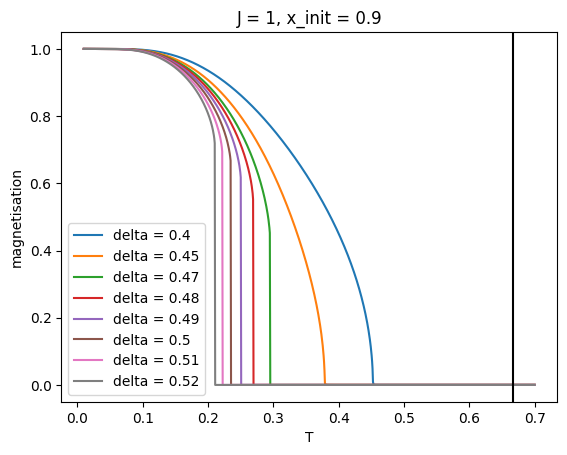

In [36]:
for idx, delta in enumerate(Delta_list):
    plt.plot(T, x_star_list[idx], label = 'delta = ' + str(delta))

plt.axvline(x=2/3, color="black")
plt.xlabel('T')
plt.ylabel('magnetisation')
plt.title(f"J = {J}, x_init = {x_init}")
plt.legend()
plt.show()

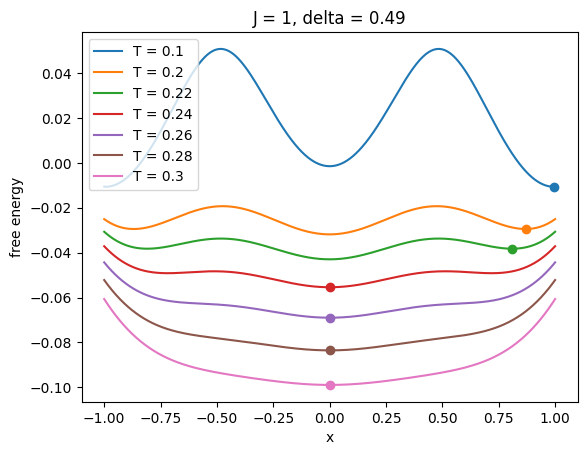

In [45]:
J = 1
delta = 0.49
x_space = np.linspace(-1, 1, 1024)
T_list = [.1, .2, .22, .24, .26, .28, .3]

for T in T_list:
    plt.plot(x_space, free_energy(x_space, T, J, delta), label = 'T = ' + str(T))
    x_info = fixed_point_iter(T, J, delta, 0.49)
    plt.scatter(x_info, free_energy(x_info, T, J, delta))


plt.xlabel('x')
plt.ylabel('free energy')
plt.title(f"J = {J}, delta = {delta}")
plt.legend()
plt.show()

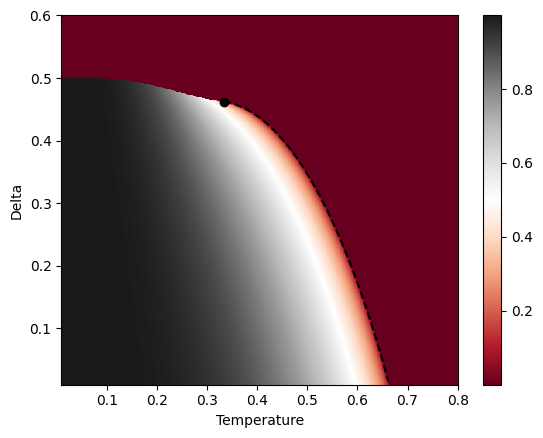

In [46]:
# Phase diagram

J = 1
x_info = 0.9
x_zero = 0.1

Delta_list = np.linspace(1e-2, .6, 512)
T_list = np.linspace(1e-2, .8, 512)

magnetisation = np.zeros((len(Delta_list), len(T_list)))
for i, Delta in enumerate(Delta_list):
    for j, T in enumerate(T_list):
        x_info_item = fixed_point_iter(T, J, Delta, x_init=x_info)
        x_zero_item = fixed_point_iter(T, J, Delta, x_init=x_zero)
        f_info = free_energy(x_info_item, T, J, Delta)
        f_zero = free_energy(x_zero_item, T, J, Delta)


        if f_info < f_zero:
            magnetisation[i,j] = x_info_item
        else:
            magnetisation[i,j] = x_zero_item


plt.pcolormesh(T_list, Delta_list, magnetisation, cmap='RdGy')
plt.xlabel("Temperature")
plt.ylabel("Delta")
plt.colorbar()

T_critical = np.linspace(J/3, 2/3*J-5e-3, 1024)
critical_line = T_critical * np.log(2*(J/T_critical - 1))
plt.plot(T_critical, critical_line, color='black', linestyle='--')
plt.plot(J/3, np.log(4)/3*J, color='black', marker='o')
plt.show()
